ANOVA F-statistic: 0.5592
ANOVA p-value: 0.5782
❌ No statistically significant difference found between groups

Tukey HSD results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 test 0% test 50%   0.0119 0.5837 -0.0176 0.0414  False
 test 0% test 75%   0.0024 0.9782 -0.0271 0.0319  False
test 50% test 75%  -0.0095 0.7066  -0.039   0.02  False
-------------------------------------------------------


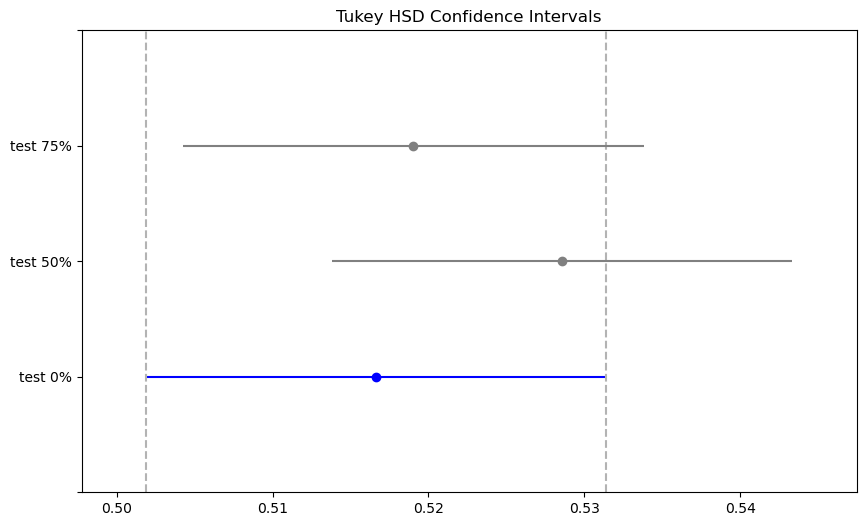

In [1]:
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Data
data = {
    "test 0%": [
        0.5119, 0.5357, 0.5119, 0.5357, 0.5238,
        0.4762, 0.5119, 0.5238, 0.5238, 0.5119
    ],
    "test 50%": [
        0.5714, 0.5357, 0.5357, 0.5595, 0.5119,
        0.4643, 0.5714, 0.5357, 0.5119, 0.4881
    ],
    "test 75%": [
        0.5476, 0.5119, 0.5238, 0.5357, 0.5119,
        0.4643, 0.5238, 0.5476, 0.5238, 0.5
    ]
}

# Prepare data for ANOVA
groups = []
values = []
for label, scores in data.items():
    groups.extend([label] * len(scores))
    values.extend(scores)

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*data.values())

print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ Statistically significant difference found between groups (p < 0.05)")
else:
    print("❌ No statistically significant difference found between groups")

# Tukey HSD (post-hoc analysis)
df = pd.DataFrame({'accuracy': values, 'group': groups})
tukey = pairwise_tukeyhsd(endog=df['accuracy'], groups=df['group'], alpha=0.05)
print("\nTukey HSD results:\n", tukey)

# Optional: plot
tukey.plot_simultaneous(comparison_name="test 0%")
plt.title("Tukey HSD Confidence Intervals")
plt.show()


